In [2]:
# libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi


In [3]:
# load in hit song files
d1990 = pd.read_csv('1990data_final.csv')
d2000 = pd.read_csv('2000data_final.csv')
d2010 = pd.read_csv('2010data_final.csv')
d2019 = pd.read_csv('2019data_final.csv')

In [4]:
df1 = d1990[['acousticness',
 'danceability',
 #'duration_ms',
 'energy',
 #'instrumentalness',
 'liveness',
  'mode',
 'speechiness',
 #'tempo',
 'valence']]


df2 = d2000[['acousticness',
 'danceability',
 #'duration_ms',
 'energy',
 #'instrumentalness',
 'liveness',
  'mode',
 'speechiness',
 #'tempo',
 'valence']]


df3 = d2010[['acousticness',
 'danceability',
 #'duration_ms',
 'energy',
 #'instrumentalness',
 'liveness',
  'mode',
 'speechiness',
 #'tempo',
 'valence']]


df4 = d2019[['acousticness',
 'danceability',
 #'duration_ms',
 'energy',
 #'instrumentalness',
 'liveness',
  'mode',
 'speechiness',
 #'tempo',
 'valence']]


In [5]:
df =pd.DataFrame({
   'acousticness':[],
 'danceability':[],
 #'duration_ms',
 'energy':[],
 #'instrumentalness':[],
 'liveness':[],
  'mode':[],
 'speechiness':[],
 #'tempo',
 'valence':[]
})
    

In [6]:

df.loc[0] = df1.mean()
df.loc[1] = df2.mean()
df.loc[2] = df3.mean()
df.loc[3] = df4.mean()
df['group'] = ['1990', '2000', '2010', '2019']
df = df[[  'group', 'acousticness',
 'danceability',
 #'duration_ms',
 'energy',
 #'instrumentalness':[],
 'liveness',
  'mode',
 'speechiness',
 #'tempo',
 'valence']]
df

,group,acousticness,danceability,energy,liveness,mode,speechiness,valence
0,1990,0.216556,0.620109,0.640233,0.165804,0.676520,0.074460,0.553916
1,2000,0.204900,0.638243,0.676704,0.181879,0.643697,0.075322,0.543036
2,2010,0.179450,0.618529,0.698271,0.199375,0.688907,0.082837,0.523154
3,2019,0.228202,0.689651,0.618207,0.173276,0.653321,0.130081,0.493921


In [1]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
    plt.subplots_adjust(hspace=0.6, wspace=0.15)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=5)

    # Draw ylabels
    ax.set_rlabel_position(0.1)
    plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=5)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=7, color=color, y=1.17)

    # ------- PART 2: Apply to all individuals
    # initialize the figure
#     my_dpi=120
#     plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
    plt.savefig('111', dpi=300)


# Create a color palette:
# my_palette = plt.cm.get_cmap("Set3", len(df.index))
my_palette = plt.cm.get_cmap('gist_rainbow', len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Year '+df['group'][row], color=my_palette(row))

NameError: name 'plt' is not defined

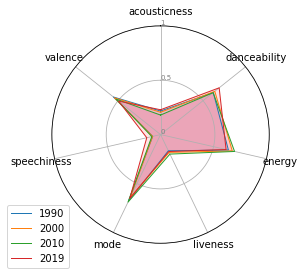

In [8]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
plt.ylim(0,1)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="1990")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2000")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2010")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2019")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.2))
# set_dpi(100)
plt.savefig('collaposed.png', dpi=200)